<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Mercury_Orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

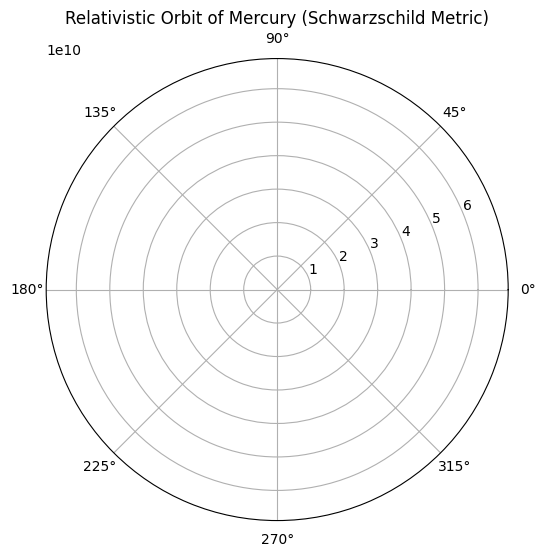

In [ ]:
!pip install matplotlib


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.artist as martist
import matplotlib.animation as animation

# Constants for the simulation
G = 6.67430e-11         # Gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30            # Mass of the Sun, kg
c = 299792458           # Speed of light, m/s
AU = 1.496e11           # Astronomical unit in meters
perihelion_distance = 4.6e10  # Perihelion of Mercury in meters

# Simulation parameters
num_points = 2000       # Number of points for orbit
theta_max = 12 * np.pi  # Total angle to cover (over many orbits)
dt = theta_max / num_points

# Constants derived for the Schwarzschild orbit
L = perihelion_distance * 5.79e10  # Effective angular momentum, exaggerated for illustration
alpha = (3 * G * M) / (c**2 * perihelion_distance)  # Schwarzschild precession term

# Arrays for theta and radial distance r
theta = np.linspace(0, theta_max, num_points)
r = np.zeros(num_points)
r[0] = perihelion_distance

# Solve orbit equation under Schwarzschild metric (approximate solution)
for i in range(1, num_points):
    r[i] = perihelion_distance / (1 + 0.205 * np.cos(theta[i]) + alpha * theta[i])

# Setting up the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 1.5 * perihelion_distance)
ax.set_title("Relativistic Orbit of Mercury (Schwarzschild Metric)")

# Initialize the line and point for the orbit
line, = ax.plot([], [], lw=1.5, color='orange')
point, = ax.plot([], [], 'o', color='red', markersize=5)

# Initialization function to set up background
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Animation function
def animate(i):
    line.set_data(theta[:i], r[:i])
    point.set_data(theta[i], r[i])
    return line, point

# Call the animator with init_func properly defined
ani = animation.FuncAnimation(fig, animate, frames=num_points, init_func=init, interval=10, blit=True)

plt.show()